In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read files
stress_data=pd.read_csv("combined_data.csv")

In [3]:
stress_data.head()

,Unnamed: 0,id,time,x,y,z,hr,bvp,eda,temp,label
0,0,0,0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,1,0,1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,2,0,2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,3,0,3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,4,0,4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


Since id and time columns are relevant to generate model we will be dropping them

In [4]:
stress_data.drop(columns=['Unnamed: 0','id','time'],inplace=True)

In [5]:
## Renaming the Accelerometer data columns
stress_data.columns=('ACC_X','ACC_Y','ACC_Z','hr','bvp','eda','temp','stress_label')

In [6]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


### Checking Null Value

In [7]:
stress_data.isnull().sum()

ACC_X           0
ACC_Y           0
ACC_Z           0
hr              0
bvp             0
eda             0
temp            0
stress_label    0
dtype: int64

### Checking for data statistics

In [8]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137215 entries, 0 to 137214
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ACC_X         137215 non-null  float64
 1   ACC_Y         137215 non-null  float64
 2   ACC_Z         137215 non-null  float64
 3   hr            137215 non-null  float64
 4   bvp           137215 non-null  float64
 5   eda           137215 non-null  float64
 6   temp          137215 non-null  float64
 7   stress_label  137215 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


### Feature engineering

In [9]:
stress_data['acc_mag']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2+stress_data.ACC_Z**2)
stress_data['acc_xy_sqrt']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2)

In [10]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0,61.470506,4.819901
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0,63.646930,7.887948
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0,64.008010,6.701285
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0,63.849509,9.383382
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0,64.237429,15.731915


In [11]:
stress_data.describe()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
count,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000
mean,-25.527088,-1.289276,37.763983,81.671589,0.027899,1.226292,31.640413,0.351747,64.051395,41.916917
std,31.212371,20.579846,25.093879,13.269286,26.723458,1.946584,2.402277,0.477517,2.064449,17.146448
min,-71.250000,-74.781250,-63.500000,48.000000,-456.254687,0.000000,21.410000,0.000000,9.638130,0.227503
25%,-49.781250,-11.906250,23.750000,72.170000,-4.357813,0.245657,30.010000,0.000000,63.710305,28.315449
50%,-31.000000,-2.531250,47.093750,79.530000,0.058594,0.482980,31.610000,0.000000,64.298217,42.654693
75%,-12.031250,8.000000,57.125000,89.130000,4.699531,1.217613,33.490000,1.000000,64.870243,58.338348
max,70.531250,100.250000,67.656250,146.780000,563.400000,19.685075,38.270000,1.000000,105.402030,103.282498


## Plots for EDA

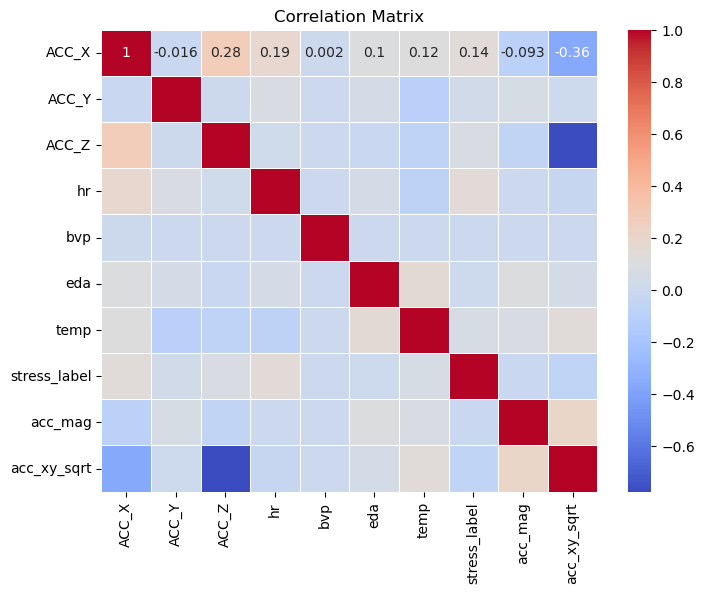

In [12]:

corr_matrix = stress_data[['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','stress_label','acc_mag','acc_xy_sqrt']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

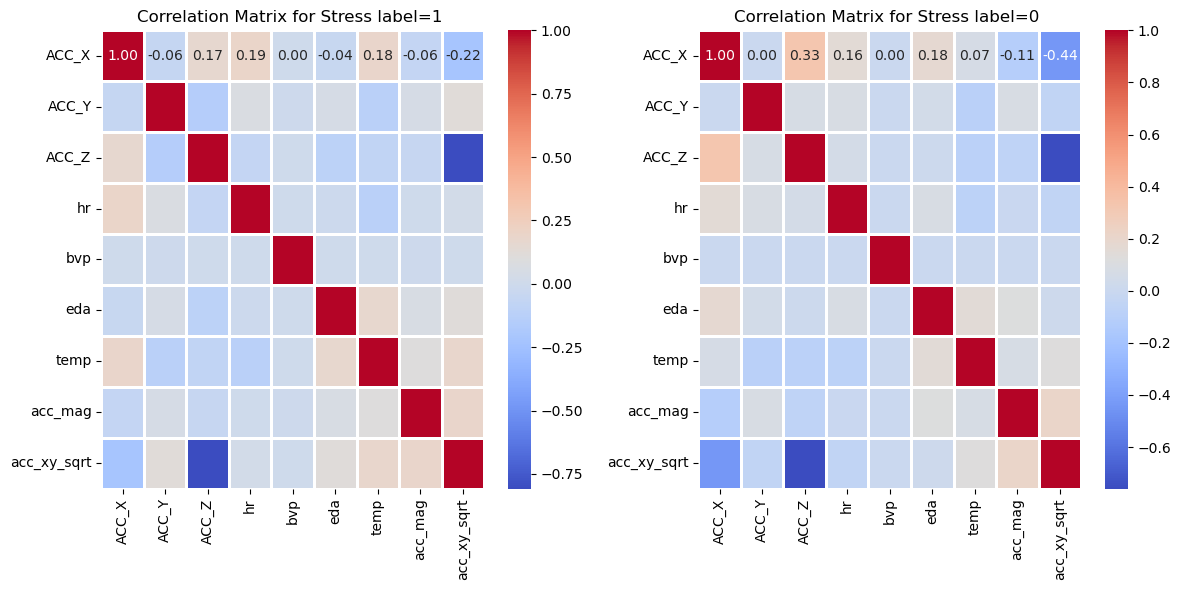

In [13]:
conditions = [
    {'stress_label': 1,  'title': 'Stress label=1 '},
    {'stress_label': 0,  'title': 'Stress label=0 '}
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, condition in enumerate(conditions):
    corr_matrix = stress_data[
        (stress_data['stress_label'] == condition['stress_label']) 
    ][['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','acc_mag','acc_xy_sqrt']].corr()

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        xticklabels=True,
        yticklabels=True,
        fmt=".2f",
        linewidths=2,
        ax=ax[i]
    )
    
    ax[i].set_title(f'Correlation Matrix for {condition["title"]}')

plt.tight_layout()

plt.show()

### Checking distribution for each features

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

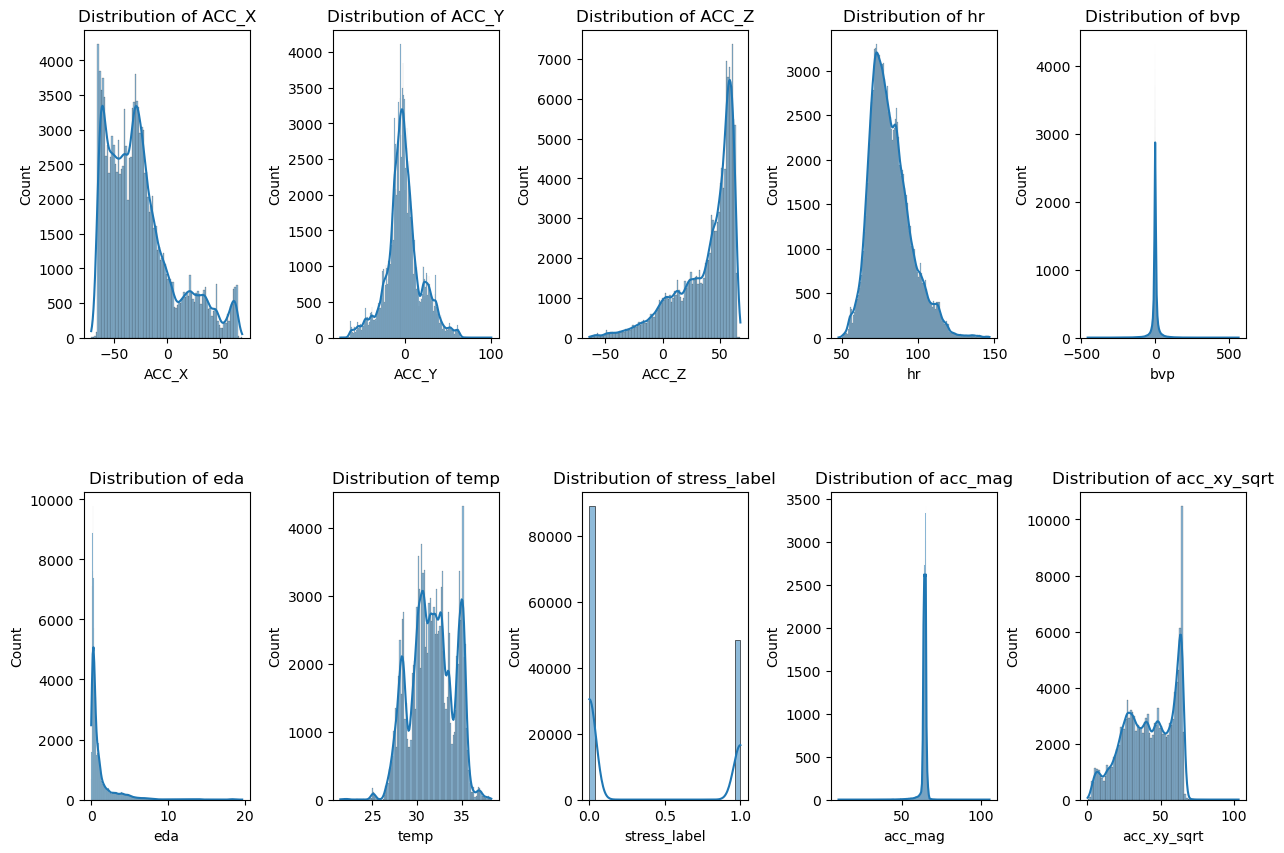

In [14]:
def plotPerColumnDistribution(dataframe, num_cols_per_row=5, figsize=(15, 10), num_columns=10):
    columns_to_plot = dataframe.columns[:num_columns]
    num_cols = len(columns_to_plot)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, column in enumerate(columns_to_plot):
        row_idx = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        
        sns.histplot(dataframe[column], ax=ax, kde=True)
        ax.set_title(f'Distribution of {column}')
        
    for i in range(num_cols, num_cols_per_row * num_rows):
        fig.delaxes(axes[i])
    
    plt.show()

# plot
plotPerColumnDistribution(stress_data, num_cols_per_row=5, num_columns=10)


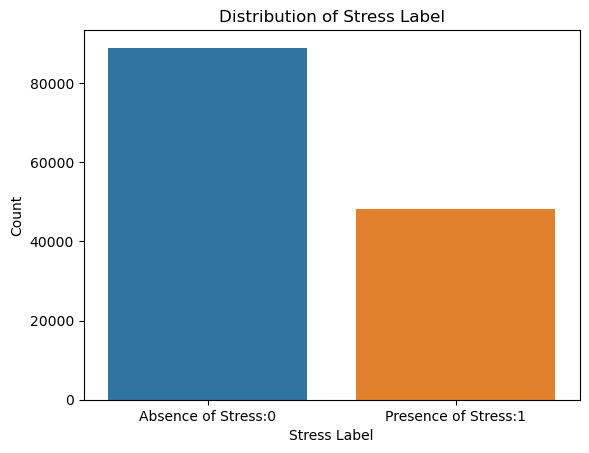

In [15]:

sns.countplot(x='stress_label', data=stress_data)
plt.title('Distribution of Stress Label')
plt.xlabel('Stress Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absence of Stress:0', 'Presence of Stress:1']) 
plt.show()

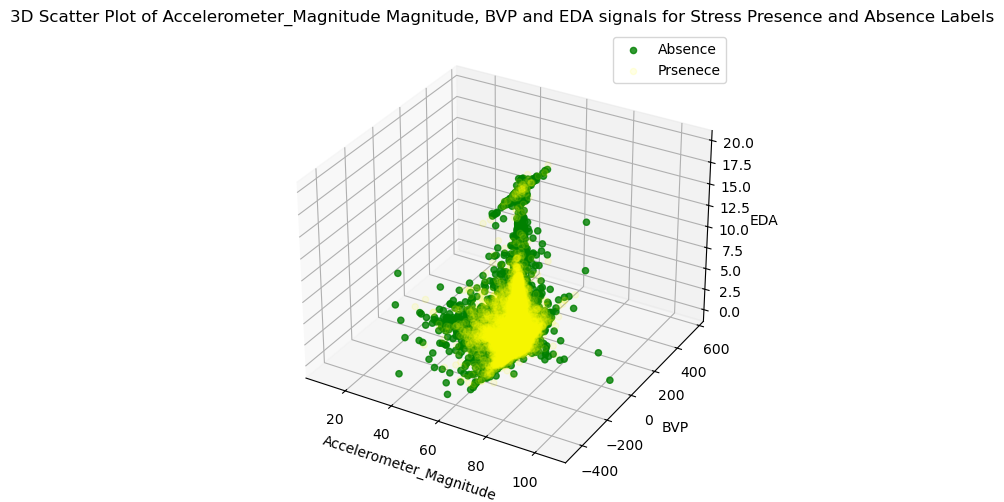

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for both temperature sets
fig = plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
ax = fig.add_subplot(111, projection='3d')

sc1 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==0)],stress_data['bvp'][(stress_data['stress_label']==0)],stress_data['eda'][(stress_data['stress_label']==0)],c='green', label='Absence',alpha=0.8)

sc2 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==1)],stress_data['bvp'][(stress_data['stress_label']==1)],stress_data['eda'][(stress_data['stress_label']==1)], c='yellow',label='Prsenece', alpha=0.1)
plt.title('3D Scatter Plot of Accelerometer_Magnitude Magnitude, BVP and EDA signals for Stress Presence and Absence Labels')
ax.set_xlabel('Accelerometer_Magnitude')
ax.set_ylabel('BVP')
ax.set_zlabel('EDA')
#fig.colorbar(sc1, ax=ax, label='Stress Labels')
plt.legend()
plt.show()

In [17]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Handling class imbalance : using Oversampling technique ADASYN

Reference : 
- https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa

- https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
feature=stress_data.drop(columns=['stress_label'])

In [21]:
target=stress_data.stress_label

In [22]:
pip install fast_ml --quiet

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Split the data into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(feature, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
# Print the shapes of each dataset
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (96050, 9) (96050,)
Validation set shape: (20582, 9) (20582,)
Testing set shape: (20583, 9) (20583,)


In [25]:
y_train.head(10)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
99906     1
54763     1
124402    1
80734     1
Name: stress_label, dtype: int64

In [26]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### We will perform data standardization

In [28]:
import time 
start_time_basic = time.time()

In [29]:
# define the pipeline
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [30]:
RandomForest_pipe = Pipeline(steps)
RandomForest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])

In [31]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### Building base RandomForest Classification model before oversampling the target variable

In [32]:

#model = RandomForestClassifier(min_samples_leaf=5 ,random_state=123)
#model.fit(train, y_train)
print('Validation set Recall: ', 
      recall_score(y_valid, RandomForest_pipe.predict(X_valid)))

Validation set Recall:  0.9066794942275975


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

# Predictions on the validation set
y_valid_pred = RandomForest_pipe.predict(X_valid)

# Predictions on the test set
y_test_pred = RandomForest_pipe.predict(X_test)

# Evaluation metrics for the validation set
print("Evaluation Metrics for Validation Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_valid_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))
print("Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred))
print("Recall:", recall_score(y_valid, y_valid_pred))
print("F1 Score:", f1_score(y_valid, y_valid_pred))

# Evaluation metrics for the test set
print("\nEvaluation Metrics for Test Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))


Evaluation Metrics for Validation Set:
Confusion Matrix:
[[13053   253]
 [  679  6597]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     13306
           1       0.96      0.91      0.93      7276

    accuracy                           0.95     20582
   macro avg       0.96      0.94      0.95     20582
weighted avg       0.95      0.95      0.95     20582

Accuracy: 0.9547177145078224
Precision: 0.963065693430657
Recall: 0.9066794942275975
F1 Score: 0.9340223700976922

Evaluation Metrics for Test Set:
Confusion Matrix:
[[13113   258]
 [  705  6507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     13371
           1       0.96      0.90      0.93      7212

    accuracy                           0.95     20583
   macro avg       0.96      0.94      0.95     20583
weighted avg       0.95      0.95      0.95     20583

Accuracy: 0.9

In [35]:
from sklearn.metrics import log_loss

# Predict probabilities for validation set
y_valid_pred_proba = RandomForest_pipe.predict_proba(X_valid)

# Predict probabilities for test set
y_test_pred_proba = RandomForest_pipe.predict_proba(X_test)

# Calculate log loss for validation set
log_loss_valid = log_loss(y_valid, y_valid_pred_proba)
print("\nLog Loss for Validation Set:", log_loss_valid)

# Calculate log loss for test set
log_loss_test = log_loss(y_test, y_test_pred_proba)
print("Log Loss for Test Set:", log_loss_test)



Log Loss for Validation Set: 0.15466234859205336
Log Loss for Test Set: 0.15611374525474267


In [36]:
end_time_basic = time.time()

In [37]:
execution_time_basic = end_time_basic - start_time_basic
print(f'Execution time for random forest before Adasyn): {execution_time_basic} seconds')

Execution time for random forest before Adasyn): 186.94280672073364 seconds


### We will perform ADASYN to rebalance dataset

In [40]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

print('Resampled dataset after ADASYN shape %s' % Counter(y_ada))

Resampled dataset after ADASYN shape Counter({1: 63884, 0: 62273})


#### After resampling using ADASYN , target variable is resampled:
- Stress_label : 1 has 63716 data
- Stress_label : 0 has 62012 data

In [41]:
X_ada.head(5)

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
0,-32.21875,-26.84375,49.40625,68.60,4.952969,0.071135,32.49,64.804416,41.936080
1,-26.53125,4.15625,57.46875,75.22,2.952969,0.267782,32.65,63.433736,26.854825
2,21.81250,-59.00000,-10.53125,65.67,0.760000,0.138962,31.29,63.778463,62.902982
3,-1.00000,-6.62500,63.12500,81.18,4.299688,0.265502,35.27,63.479573,6.700047
4,-28.78125,15.68750,55.87500,85.58,-0.093906,0.342115,35.34,64.780195,32.778926


Text(0.5, 0.98, 'Stress Label data with ADASYN oversampling')

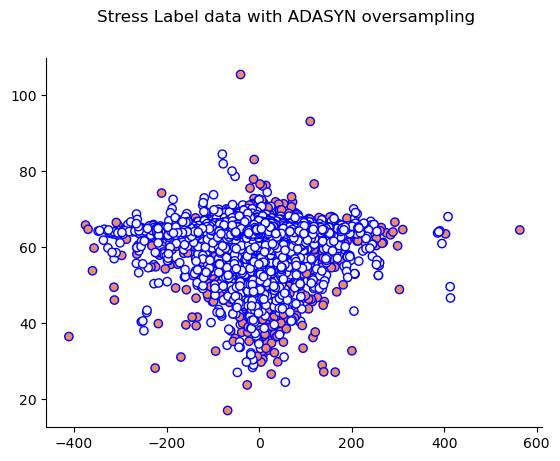

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#ax = fig.add_subplot()
kwarg_params = {'linewidth': 1, 'edgecolor': 'blue'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_ada]
plt.scatter(X_ada.bvp,X_ada.acc_mag, c=colors, **kwarg_params)

ax.set_xlabel('BVP')
ax.set_ylabel('EDA')
sns.despine()
plt.suptitle("Stress Label data with ADASYN oversampling")

###  We will perform Random Forest Classification again on ADASYN resampled dataset

In [74]:
start_time_Adasyn = time.time()

In [75]:
# define the pipeline

steps = [
    ('scalar', StandardScaler()),
    ('ada_model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [76]:
ada_pipe = Pipeline(steps)


In [77]:
#ada_model = RandomForestClassifier(min_samples_leaf=5,
#                                   random_state=123)
ada_pipe.fit(X_ada, y_ada)
y_pred=ada_pipe.predict(X_valid)
print('Validation set Recall: ', 
      recall_score(y_valid, y_pred))

Validation set Recall:  0.9605552501374381


In [78]:
## For printing standardized data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler = scaler.fit(X_ada)
# standardization the dataset and print the first 5 rows
#normalized = scaler.transform(X_ada)
#for i in range(6):
# print(normalized[i])

In [79]:
print('Validation set Accuracy: ', 
      accuracy_score(y_valid, y_pred))

Validation set Accuracy:  0.943348556991546


In [80]:
##Testing the model on y_test
ypred_testdata=ada_pipe.predict(X_test)

In [81]:
print('Validation set Accuracy: ', accuracy_score(y_test, ypred_testdata))

Validation set Accuracy:  0.9448574065976777


In [82]:
ada_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scalar', StandardScaler()),
                ('ada_model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])>

In [83]:
# Calculate and print confusion matrix for validation set
conf_matrix_valid = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix for Validation Set:")
print(conf_matrix_valid)

# Calculate and print accuracy for validation set
accuracy_valid = accuracy_score(y_valid, y_pred)
print("\nAccuracy for Validation Set:", accuracy_valid)

# Calculate and print precision for validation set
precision_valid = precision_score(y_valid, y_pred)
print("Precision for Validation Set:", precision_valid)

# Calculate and print recall for validation set
recall_valid = recall_score(y_valid, y_pred)
print("Recall for Validation Set:", recall_valid)

# Calculate and print F1-score for validation set
f1_valid = f1_score(y_valid, y_pred)
print("F1 Score for Validation Set:", f1_valid)


Confusion Matrix for Validation Set:
[[12427   879]
 [  287  6989]]

Accuracy for Validation Set: 0.943348556991546
Precision for Validation Set: 0.8882816471784444
Recall for Validation Set: 0.9605552501374381
F1 Score for Validation Set: 0.9230058108821976


In [84]:
# Calculate and print confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, ypred_testdata)
print("\nConfusion Matrix for Testing Set:")
print(conf_matrix_test)

# Calculate and print accuracy for testing set
accuracy_test = accuracy_score(y_test, ypred_testdata)
print("\nAccuracy for Testing Set:", accuracy_test)

# Calculate and print precision for testing set
precision_test = precision_score(y_test, ypred_testdata)
print("Precision for Testing Set:", precision_test)

# Calculate and print recall for testing set
recall_test = recall_score(y_test, ypred_testdata)
print("Recall for Testing Set:", recall_test)

# Calculate and print F1-score for testing set
f1_test = f1_score(y_test, ypred_testdata)
print("F1 Score for Testing Set:", f1_test)



Confusion Matrix for Testing Set:
[[12521   850]
 [  285  6927]]

Accuracy for Testing Set: 0.9448574065976777
Precision for Testing Set: 0.8907033560498907
Recall for Testing Set: 0.9604825291181365
F1 Score for Testing Set: 0.92427780372273


In [85]:
from sklearn.metrics import log_loss

# Predict probabilities for validation set after ADASYN
y_valid_ada_pred_proba = ada_pipe.predict_proba(X_valid)

# Predict probabilities for test set after ADASYN
y_test_ada_pred_proba = ada_pipe.predict_proba(X_test)

# Calculate log loss for validation set after ADASYN
log_loss_valid_ada = log_loss(y_valid, y_valid_ada_pred_proba)
print("\nLog Loss for Validation Set after ADASYN:", log_loss_valid_ada)

# Calculate log loss for test set after ADASYN
log_loss_test_ada = log_loss(y_test, y_test_ada_pred_proba)
print("Log Loss for Test Set after ADASYN:", log_loss_test_ada)



Log Loss for Validation Set after ADASYN: 0.17823845614894426
Log Loss for Test Set after ADASYN: 0.17970887675973687


In [86]:
end_time_Adasyn = time.time()

In [87]:
execution_time_Adasyn = end_time_Adasyn - start_time_Adasyn
print(f'Execution time for random forest after Adasyn): {execution_time_Adasyn} seconds')

Execution time for random forest after Adasyn): 145.51855421066284 seconds


## Model Building Random forest after ADASYN using Hyperparameters

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

# Start Time
start_time_1 = time.time()

param_grid = {
    'n_estimators': [100, 200, 300],    
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]        
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

end_time_1 = time.time()

best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train, y_train)

# End Time
end_time_2 = time.time()



Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
#Feature Importance Analysis

In [96]:
# Extract feature names from the columns of X_train
feature_names = X_train.columns.tolist()


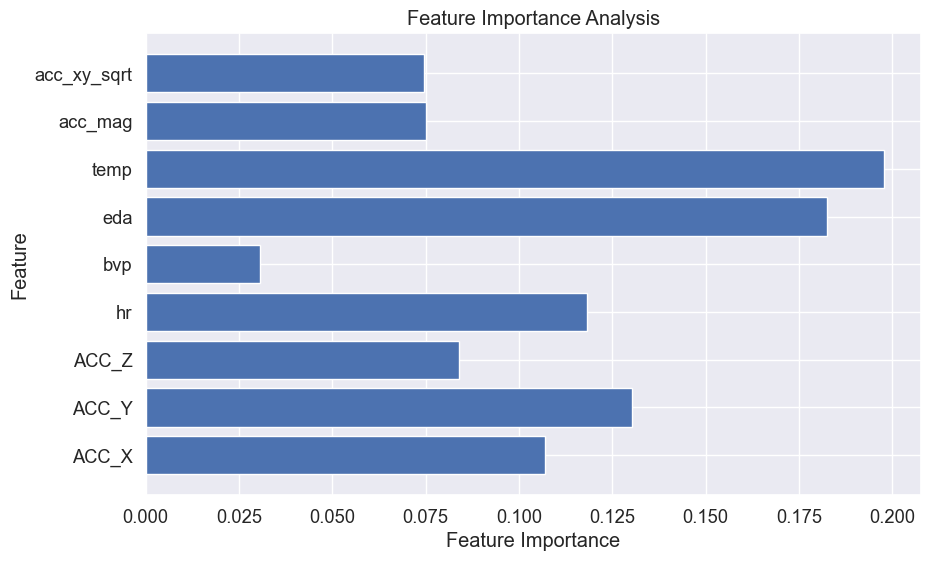

In [97]:
feature_importance = best_rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()


In [98]:
#Model Evaluation

In [99]:
y_pred_best = best_rf_model.predict(X_valid)
print("Classification Report for Best RandomForest Model:")
print(classification_report(y_valid, y_pred_best))
print("Confusion Matrix for Best RandomForest Model:")
print(confusion_matrix(y_valid, y_pred_best))


Classification Report for Best RandomForest Model:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13306
           1       0.97      0.93      0.95      7276

    accuracy                           0.96     20582
   macro avg       0.96      0.96      0.96     20582
weighted avg       0.96      0.96      0.96     20582

Confusion Matrix for Best RandomForest Model:
[[13085   221]
 [  524  6752]]


In [103]:
#Execution time

In [104]:
# Calculate Execution time
execution_time_1 = end_time_1 - start_time_1
execution_time_2 = end_time_2 - start_time_1

# Predictions on the validation set
y_valid_pred_rf = best_rf_model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print("Validation Set Accuracy (Random Forest):", valid_accuracy_rf)

# Predictions on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Set Accuracy (Random Forest):", test_accuracy_rf)

Validation Set Accuracy (Random Forest): 0.9638033232921971
Test Set Accuracy (Random Forest): 0.9630277413399407


In [138]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, matthews_corrcoef
import numpy as np

# Metrics calculation for validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred_rf)
valid_precision = precision_score(y_valid, y_valid_pred_rf)
valid_recall = recall_score(y_valid, y_valid_pred_rf)
valid_f1 = f1_score(y_valid, y_valid_pred_rf)
valid_roc_auc = roc_auc_score(y_valid, y_valid_pred_rf)
valid_kappa = cohen_kappa_score(y_valid, y_valid_pred_rf)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred_rf)
tn, fp, fn, tp = valid_conf_matrix.ravel()
valid_specificity = tn / (tn + fp)
valid_gmeasure = np.sqrt(valid_recall * valid_specificity)
valid_youden_j = valid_recall + valid_specificity - 1
valid_markedness = valid_precision + valid_specificity - 1
valid_mcc = matthews_corrcoef(y_valid, y_valid_pred_rf)

# Metrics calculation for test set
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
test_precision = precision_score(y_test, y_test_pred_rf)
test_recall = recall_score(y_test, y_test_pred_rf)
test_f1 = f1_score(y_test, y_test_pred_rf)
test_roc_auc = roc_auc_score(y_test, y_test_pred_rf)
test_kappa = cohen_kappa_score(y_test, y_test_pred_rf)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
tn, fp, fn, tp = test_conf_matrix.ravel()
test_specificity = tn / (tn + fp)
test_gmeasure = np.sqrt(test_recall * test_specificity)
test_youden_j = test_recall + test_specificity - 1
test_markedness = test_precision + test_specificity - 1
test_mcc = matthews_corrcoef(y_test, y_test_pred_rf)

# Display metrics
print("Validation Set Metrics:")
print("Accuracy:", valid_accuracy)
print("Precision:", valid_precision)
print("Recall:", valid_recall)
print("F1 Score:", valid_f1)
print("ROC-AUC Score:", valid_roc_auc)
print("Kappa Score:", valid_kappa)
print("Confusion Matrix:\n", valid_conf_matrix)
print("Specificity:", valid_specificity)
print("G-Measure:", valid_gmeasure)
print("Youden's J Statistic:", valid_youden_j)
print("Markedness:", valid_markedness)
print("Matthew's Correlation Coefficient:", valid_mcc)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("ROC-AUC Score:", test_roc_auc)
print("Kappa Score:", test_kappa)
print("Confusion Matrix:\n", test_conf_matrix)
print("Specificity:", test_specificity)
print("G-Measure:", test_gmeasure)
print("Youden's J Statistic:", test_youden_j)
print("Markedness:", test_markedness)
print("Matthew's Correlation Coefficient:", test_mcc)

print()
print(f'Execution time for rf classifier (including hyperparameter tuning): {execution_time_2} seconds')
print(f'Execution time for hyperparameter tuning: {execution_time_1} seconds')

Validation Set Metrics:
Accuracy: 0.9638033232921971
Precision: 0.9683063243940915
Recall: 0.9279824079164376
F1 Score: 0.9477156291669591
ROC-AUC Score: 0.9556866796834556
Kappa Score: 0.9200550347222458
Confusion Matrix:
 [[13085   221]
 [  524  6752]]
Specificity: 0.9833909514504735
G-Measure: 0.9552850375936216
Youden's J Statistic: 0.9113733593669111
Markedness: 0.951697275844565
Matthew's Correlation Coefficient: 0.9205417592986511

Test Set Metrics:
Accuracy: 0.9630277413399407
Precision: 0.969027192089574
Recall: 0.9240155296727676
F1 Score: 0.9459862303925048
ROC-AUC Score: 0.9540427659582147
Kappa Score: 0.9179053469690328
Confusion Matrix:
 [[13158   213]
 [  548  6664]]
Specificity: 0.9840700022436617
G-Measure: 0.9535701150719116
Youden's J Statistic: 0.9080855319164294
Markedness: 0.9530971943332358
Matthew's Correlation Coefficient: 0.9185053364010537

Execution time for rf classifier (including hyperparameter tuning): 12628.572475910187 seconds
Execution time for hyperp

In [108]:
from sklearn.metrics import log_loss

# Predict probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid)

# Calculate log loss on the validation set
valid_log_loss = log_loss(y_valid, y_valid_pred_proba)
print("Validation Set Log Loss (Random Forest):", valid_log_loss)

# Predict probabilities on the test set
y_test_pred_proba = best_rf_model.predict_proba(X_test)

# Calculate log loss on the test set
test_log_loss = log_loss(y_test, y_test_pred_proba)
print("Test Set Log Loss (Random Forest):", test_log_loss)

Validation Set Log Loss (Random Forest): 0.12205292093346323
Test Set Log Loss (Random Forest): 0.12397571441157514


In [113]:
#Cross-Validation Analysis

In [114]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)


Cross-Validation Scores:
[0.95845914 0.96251952 0.95903175 0.95892764 0.96293597]


In [115]:
#Hyperparameter Sensitivity Analysis

In [120]:
max_depth_values = [5, 10, 15, 20, 25, 30]
for max_depth in max_depth_values:
    params = {**best_params, 'max_depth': max_depth}
    rf_model = RandomForestClassifier(**params, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print(f"Accuracy for Max Depth {max_depth}: {accuracy}")


Accuracy for Max Depth 5: 0.6987659119619085
Accuracy for Max Depth 10: 0.8714896511514916
Accuracy for Max Depth 15: 0.9450004858614324
Accuracy for Max Depth 20: 0.9623457389952386
Accuracy for Max Depth 25: 0.9645321154406763
Accuracy for Max Depth 30: 0.9638033232921971


In [141]:
#Comparing Training, validation, testing accuracies

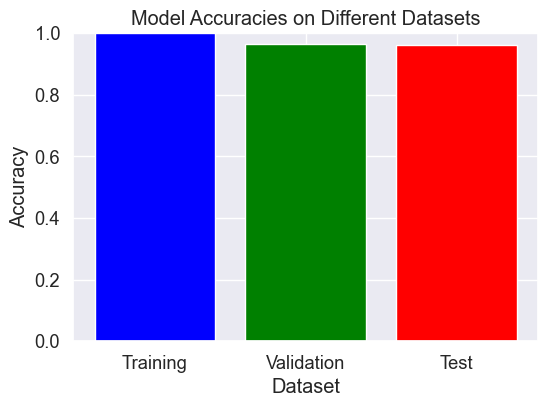

In [122]:
import matplotlib.pyplot as plt

# Train the model
best_rf_model.fit(X_train, y_train)

# Evaluate accuracies
train_accuracy = best_rf_model.score(X_train, y_train)
validation_accuracy = best_rf_model.score(X_valid, y_valid)
test_accuracy = best_rf_model.score(X_test, y_test)

# Plot accuracies
datasets = ['Training', 'Validation', 'Test']
accuracies = [train_accuracy, validation_accuracy, test_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(datasets, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracies on Different Datasets')
plt.ylim(0, 1) 
plt.show()


In [137]:
#Other model accuracies for validation comparison

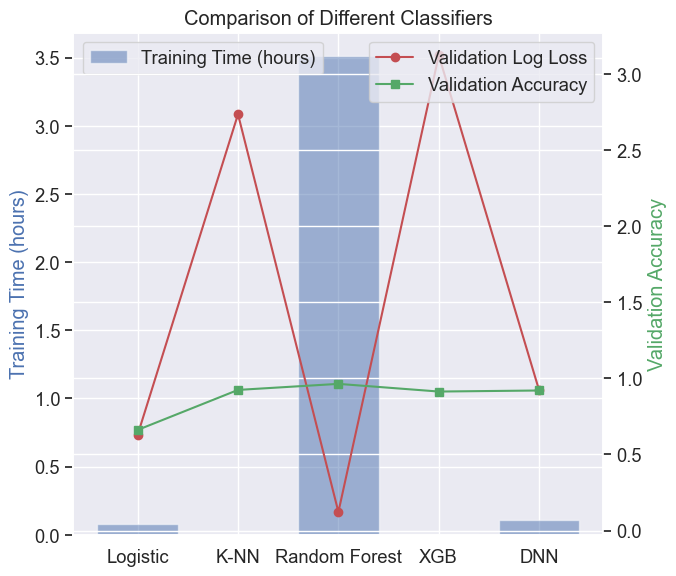

In [139]:
import matplotlib.pyplot as plt

# Data
classifiers = ['Logistic', 'K-NN', 'Random Forest', 'XGB', 'DNN']
training_times_sec = [295.9740, 0.1809, 12628.57, 11.8994, 385]
validation_log_loss = [0.6287, 2.7354, 0.12205292, 3.12243, 0.9203]
validation_accuracy = [0.6611, 0.9241, 0.96380332, 0.9134, 0.9203]

# Convert training times from seconds to hours
training_times_hours = [time_sec / 3600 for time_sec in training_times_sec]

# Plot
fig, ax1 = plt.subplots(figsize=(7, 6))

# Bar plot for training time
ax1.bar(classifiers, training_times_hours, color='b', alpha=0.5, label='Training Time (hours)')
ax1.set_ylabel('Training Time (hours)', color='b')

# secondary y-axis for log loss and accuracy
ax2 = ax1.twinx()

# Line plot for validation log loss
ax2.plot(classifiers, validation_log_loss, color='r', marker='o', label='Validation Log Loss')
ax2.set_ylabel('Validation Log Loss', color='r')

# Line plot for validation accuracy
ax2.plot(classifiers, validation_accuracy, color='g', marker='s', label='Validation Accuracy')
ax2.set_ylabel('Validation Accuracy', color='g')

# legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Comparison of Different Classifiers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [151]:
#Comparision of other metrics of all models

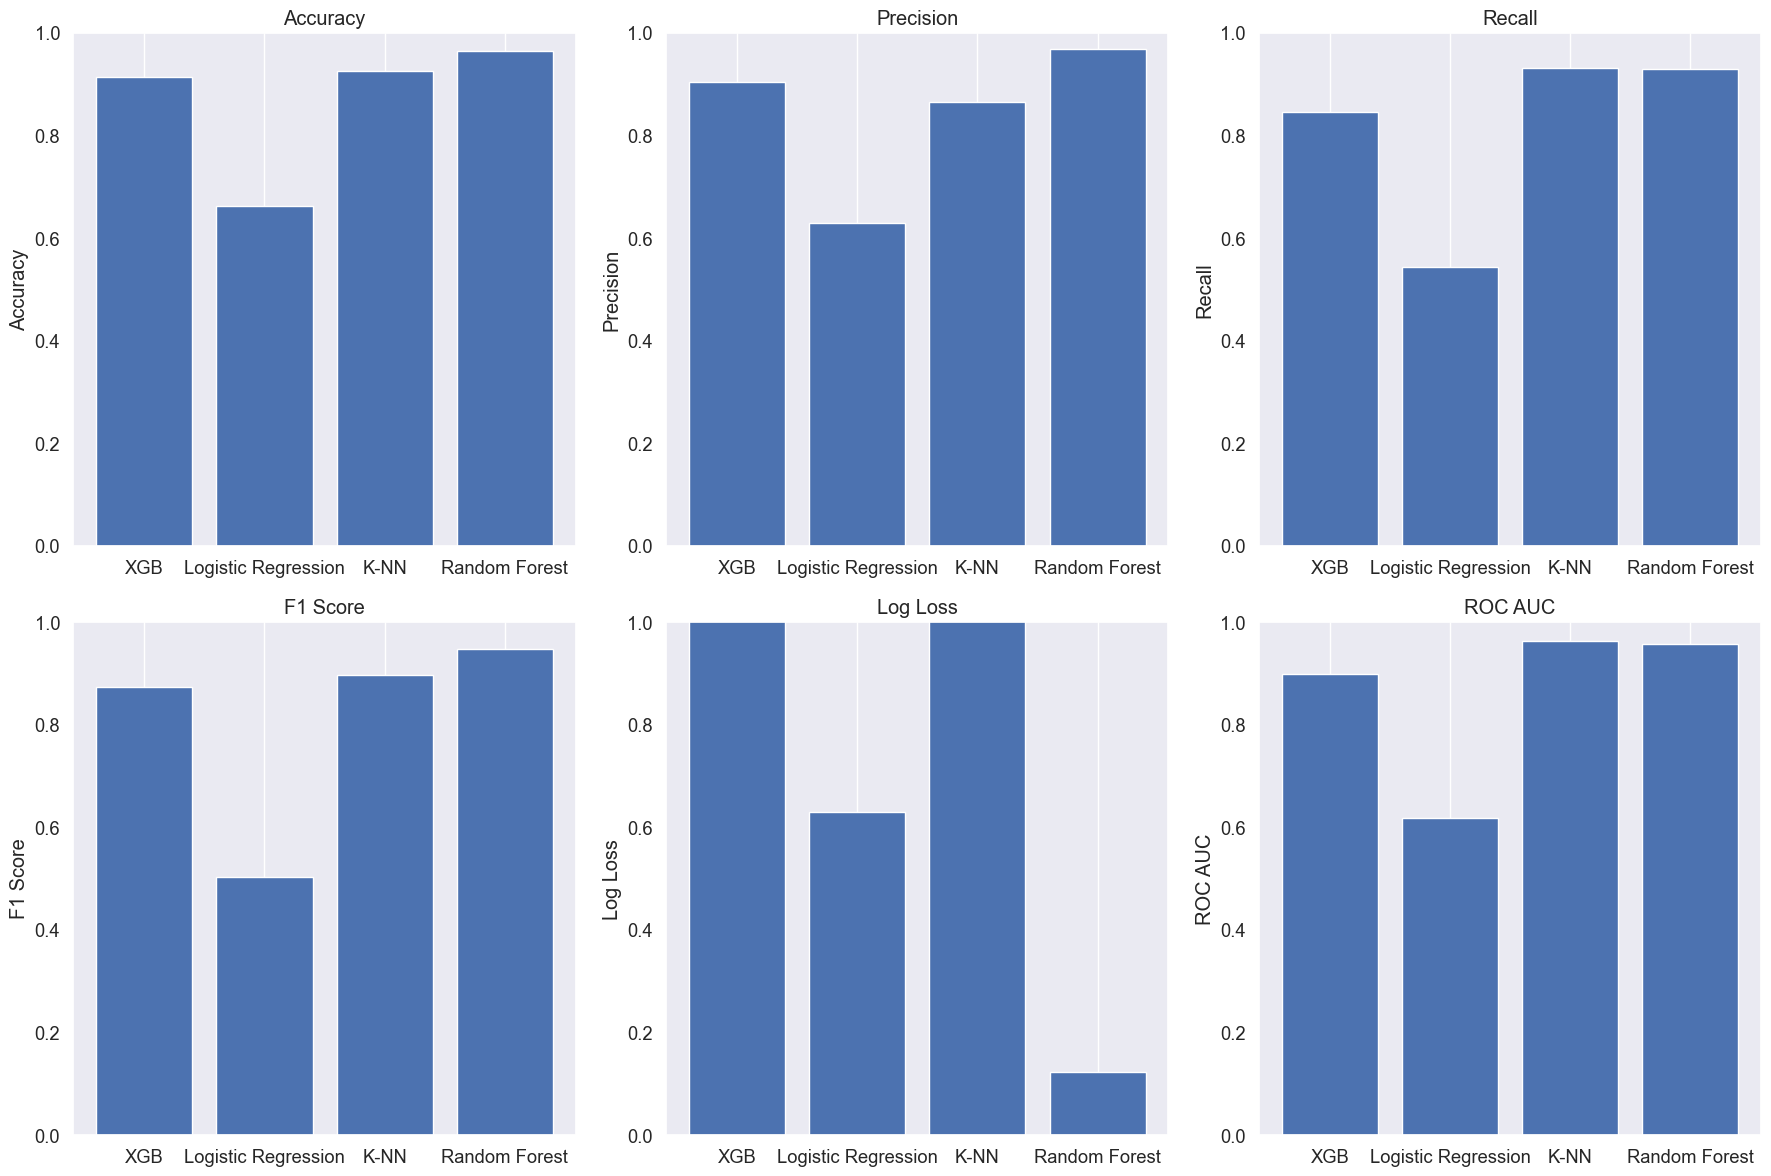

In [146]:
import matplotlib.pyplot as plt

# Data
models = ['XGB', 'Logistic Regression', 'K-NN', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'ROC AUC']
xgb_scores = [0.9134, 0.9038, 0.8448, 0.8733, 3.1224, 0.8978]
log_reg_scores = [0.6611, 0.6278, 0.5425, 0.5032, 0.6287, 0.6183]
knn_scores = [0.9241, 0.8641, 0.9318, 0.8967, 2.7354, 0.9622]
rf_scores = [0.9638, 0.9683, 0.9280, 0.9477, 0.1221, 0.9557]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, metric in enumerate(metrics):
    axs[i//3, i%3].bar(models, [xgb_scores[i], log_reg_scores[i], knn_scores[i], rf_scores[i]])
    axs[i//3, i%3].set_title(metric)
    axs[i//3, i%3].set_ylabel(metric)
    axs[i//3, i%3].set_ylim(0, 1)
    axs[i//3, i%3].grid(axis='y')

plt.tight_layout()
plt.show()

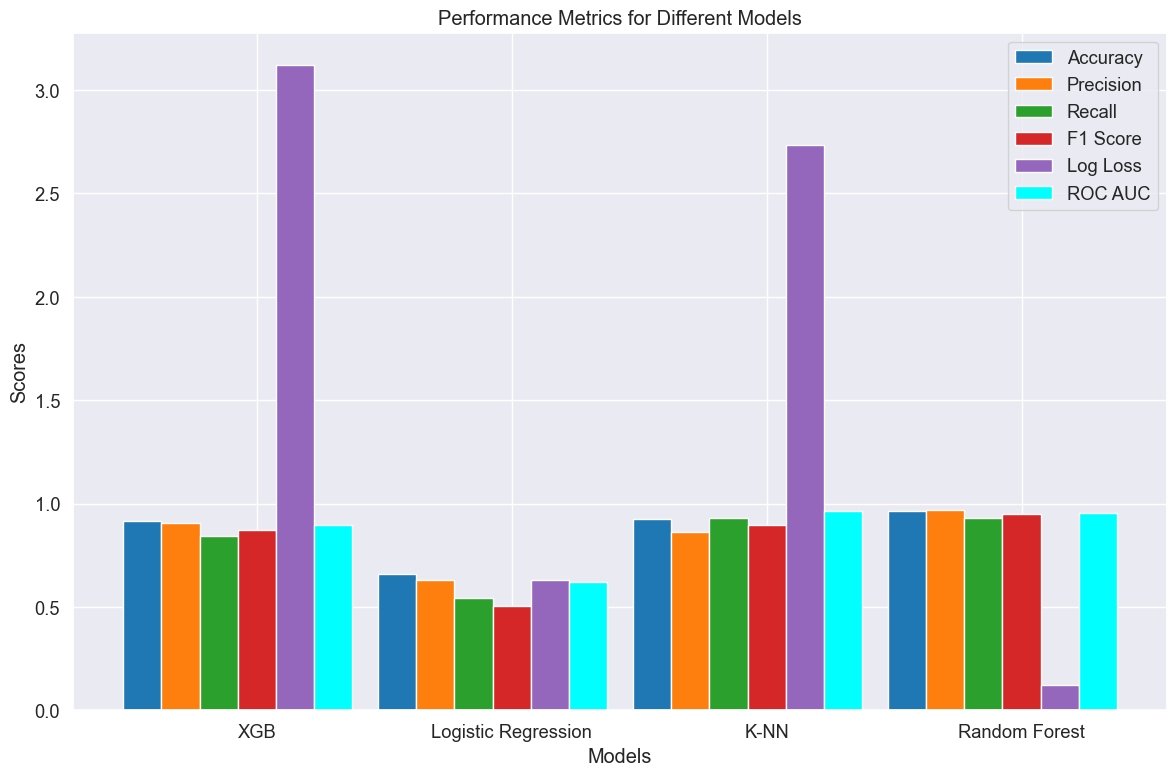

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['XGB', 'Logistic Regression', 'K-NN', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'ROC AUC']
xgb_scores = [0.9134, 0.9038, 0.8448, 0.8733, 3.1224, 0.8978]
log_reg_scores = [0.6611, 0.6278, 0.5425, 0.5032, 0.6287, 0.6183]
knn_scores = [0.9241, 0.8641, 0.9318, 0.8967, 2.7354, 0.9622]
rf_scores = [0.9638, 0.9683, 0.9280, 0.9477, 0.1221, 0.9557]

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 'cyan']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + (i * bar_width), [xgb_scores[i], log_reg_scores[i], knn_scores[i], rf_scores[i]], bar_width, label=metric, color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index + (len(metrics)/2 * bar_width))
ax.set_xticklabels(models)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

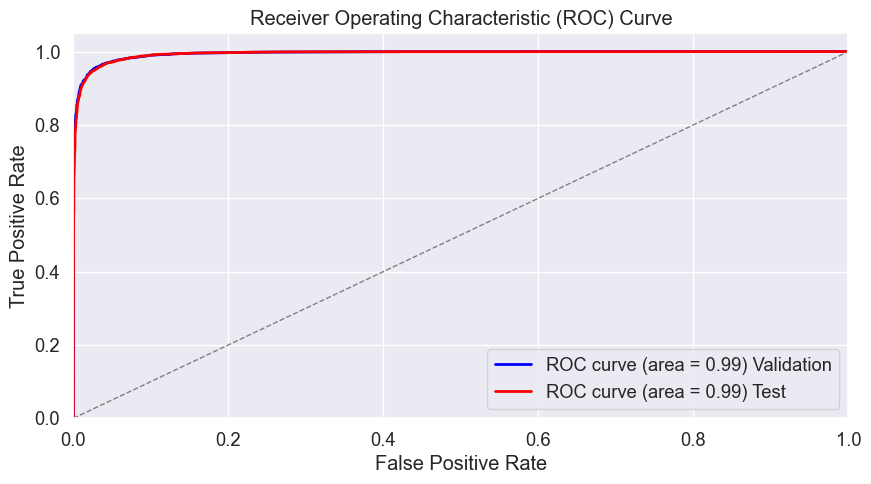

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit RandomForestClassifier
best_rf_model.fit(X_train, y_train)

# Predict probabilities for validation set
y_valid_pred_prob_rf = best_rf_model.predict_proba(X_valid)[:, 1]

# Predict probabilities for test set
y_test_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for validation set
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_pred_prob_rf)
roc_auc_valid = auc(fpr_valid, tpr_valid)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob_rf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(10, 5))

# Plot ROC curve for validation set
plt.plot(fpr_valid, tpr_valid, color='blue', lw=2, label='ROC curve (area = %0.2f) Validation' % roc_auc_valid)

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Set labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [143]:
import pickle

file_path = "random_forest.pkl"

# Save the trained model to the specified file path
with open(file_path, 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Random Forest Classifier model saved successfully as:", file_path)


Random Forest Classifier model saved successfully as: random_forest.pkl


In [144]:
import pickle
from sklearn.metrics import accuracy_score

# Load the trained RandomForestClassifier model from the pickle file
with open('random_forest.pkl', 'rb') as file:
    best_rf_model = pickle.load(file)

# Make predictions on the test data
y_pred_test = best_rf_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score on Test Data:", accuracy)

Accuracy Score on Test Data: 0.9630277413399407


In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, cohen_kappa_score, matthews_corrcoef

# Calculate precision
precision = precision_score(y_test, y_pred_test)

# Calculate recall
recall = recall_score(y_test, y_pred_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)

# Calculate log loss
y_pred_proba = best_rf_model.predict_proba(X_test)
ll = log_loss(y_test, y_pred_proba)

# Calculate kappa score
kappa = cohen_kappa_score(y_test, y_pred_test)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_test)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", ll)
print("Kappa Score:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)


Precision: 0.969027192089574
Recall: 0.9240155296727676
F1 Score: 0.9459862303925048
Log Loss: 0.12397571441157514
Kappa Score: 0.9179053469690328
Matthews Correlation Coefficient (MCC): 0.9185053364010537
